### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
def make_yearlist_ERA(yrst, yrend):
    
    baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/ERA5_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_UKESM(yrst, yrend):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_1A_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


ylist_UKESM = xr.open_mfdataset(make_yearlist_UKESM(1940,2019))
ylist_ERA = xr.open_mfdataset(make_yearlist_ERA(1940,2019))


In [5]:
ylist_UKESM_DJF = ylist_UKESM.wspd10m.sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_UKESM_MAM = ylist_UKESM.wspd10m.sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_UKESM_JJA = ylist_UKESM.wspd10m.sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_UKESM_SON = ylist_UKESM.wspd10m.sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_UKESM_FY = ylist_UKESM.wspd10m.\
groupby('time_counter.year').mean().mean(dim = 'year')

ylist_ERA_DJF = ylist_ERA.wspd10m.sel(time_counter=(ylist_ERA['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_ERA_MAM = ylist_ERA.wspd10m.sel(time_counter=(ylist_ERA['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_ERA_JJA = ylist_ERA.wspd10m.sel(time_counter=(ylist_ERA['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_ERA_SON = ylist_ERA.wspd10m.sel(time_counter=(ylist_ERA['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().mean(dim = 'year')
ylist_ERA_FY = ylist_ERA.wspd10m.\
groupby('time_counter.year').mean().mean(dim = 'year')

In [6]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = 8)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=8)
    return cb


## potential colorbar imporvement code: 
https://matplotlib.org/stable/gallery/axes_grid1/demo_edge_colorbar.html

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


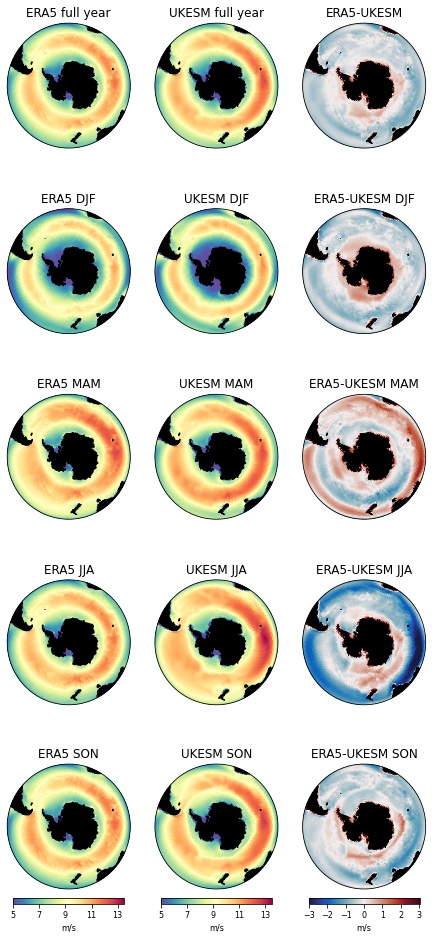

In [7]:
spbot = 5; sptop = 13.5; spint = 2
difbot = -3; diftop = 3.01; difint = 1
tcm = 'Spectral_r'

lats = ylist_ERA_FY.lat
lons = ylist_ERA_FY.lon

fact = 0.25
fig = plt.figure(figsize=[30*fact, 66*fact])


tits = ['ERA5 full year', 'UKESM full year', 'ERA5-UKESM',
       'ERA5 DJF', 'UKESM DJF', 'ERA5-UKESM DJF','ERA5 MAM', 'UKESM MAM', 'ERA5-UKESM MAM',\
        'ERA5 JJA', 'UKESM JJA', 'ERA5-UKESM JJA','ERA5 SON', 'UKESM SON', 'ERA5-UKESM SON']

toplot = [ylist_ERA_FY.values, ylist_UKESM_FY.values,\
          ylist_ERA_FY.values -ylist_UKESM_FY.values,\
          ylist_ERA_DJF.values, ylist_UKESM_DJF.values,\
          ylist_ERA_DJF.values -ylist_UKESM_DJF.values,\
          ylist_ERA_MAM.values, ylist_UKESM_MAM.values,\
          ylist_ERA_MAM.values -ylist_UKESM_MAM.values,\
          ylist_ERA_JJA.values, ylist_UKESM_JJA.values,\
          ylist_ERA_JJA.values -ylist_UKESM_JJA.values,\
          ylist_ERA_SON.values, ylist_UKESM_SON.values,\
          ylist_ERA_SON.values -ylist_UKESM_SON.values,\
         ]
      
cms = [tcm, tcm, cm.balance, tcm, tcm, cm.balance, tcm, tcm, cm.balance, tcm, tcm, cm.balance, tcm, tcm, cm.balance]
bb = [spbot, spbot, difbot,spbot, spbot, difbot,spbot, spbot, difbot,spbot, spbot, difbot, spbot, spbot, difbot]
tb = [sptop, sptop, diftop,sptop, sptop, diftop,sptop, sptop, diftop,sptop, sptop, diftop, sptop, sptop, diftop]
intvl = [spint, spint, difint,spint, spint, difint,spint, spint, difint,spint, spint, difint,spint, spint, difint]
#test = seasmean_map_ts_ukesm[0,0,:,:]


for i in range(0,15):
    test = toplot[i]
    botbound = bb[i]
    topbound = tb[i]
    tint = intvl[i]
    if i >= 12:
        tcbr = True
    else:
        tcbr = False
    ax1 = fig.add_subplot(5, 3, i+1, projection=ccrs.Orthographic(0, -90))
    bc = plot_southern(fig, ax1, lons, lats, test, botbound, 
                  topbound, np.arange(botbound,topbound,tint), fs = 12, 
                  tit = tits[i], cbarlab = 'm/s', tcmap = cms[i], lm = True, cbr = tcbr)
    
#plt.suptitle('seasonal wind speed climatology, 1950-2020', y = 0.90)
plt.tight_layout()
fig.savefig('./figs/Fig_climatologymap_UKESM_ERA.jpg', dpi = 300)

In [8]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
cdomask
tmask = cdomask.tmask

In [9]:
data = np.zeros([5,4])
df_UKESM = pd.DataFrame(data, columns=['south of -30','south-70','-70:-50','-50:-30'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df_UKESM.attrs = {"made in": 'SOZONE/windAnalyis/wspdComponents/FigMAP-HOV.ipynb'}
#df_UKESM.to_csv('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/csvs/MK_UKESM_1940-2020.csv')


In [10]:
w = ylist_UKESM_FY.values
print(np.shape(w))
data = np.zeros([5,4])

# plt.figure()
# plt.pcolormesh(tmask[20:40,:])
print(f'FY, south of -70')
print(np.average(ylist_UKESM_FY.values[0:20,:]-ylist_ERA_FY.values[0:20,:], weights=tmask[0:20,:]))
data[0,1] = (np.average(ylist_UKESM_FY.values[0:20,:]-ylist_ERA_FY.values[0:20,:], weights=tmask[0:20,:]))
print(f'DJF')
print(np.average(ylist_UKESM_DJF.values[0:20,:]-ylist_ERA_DJF.values[0:20,:], weights=tmask[0:20,:]))
data[1,1] = (np.average(ylist_UKESM_DJF.values[0:20,:]-ylist_ERA_DJF.values[0:20,:], weights=tmask[0:20,:]))
print(f'MAM')
print(np.average(ylist_UKESM_MAM.values[0:20,:]-ylist_ERA_MAM.values[0:20,:], weights=tmask[0:20,:]))
data[2,1] = (np.average(ylist_UKESM_MAM.values[0:20,:]-ylist_ERA_MAM.values[0:20,:], weights=tmask[0:20,:]))
print(f'JJA')
print(np.average(ylist_UKESM_JJA.values[0:20,:]-ylist_ERA_JJA.values[0:20,:], weights=tmask[0:20,:]))
data[3,1] = (np.average(ylist_UKESM_JJA.values[0:20,:]-ylist_ERA_JJA.values[0:20,:], weights=tmask[0:20,:]))
print(f'SON')
print(np.average(ylist_UKESM_SON.values[0:20,:]-ylist_ERA_SON.values[0:20,:], weights=tmask[0:20,:]))
data[4,1] = (np.average(ylist_UKESM_SON.values[0:20,:]-ylist_ERA_SON.values[0:20,:], weights=tmask[0:20,:]))

##
print(f'FY south of -70- -50')
print(np.average(ylist_UKESM_FY.values[20:40,:]-ylist_ERA_FY.values[20:40,:], weights=tmask[20:40,:]))
data[0,2] = (np.average(ylist_UKESM_FY.values[20:40,:]-ylist_ERA_FY.values[20:40,:], weights=tmask[20:40,:]))
print(f'DJF')
print(np.average(ylist_UKESM_DJF.values[20:40,:]-ylist_ERA_DJF.values[20:40,:], weights=tmask[20:40,:]))
data[1,2] = (np.average(ylist_UKESM_DJF.values[20:40,:]-ylist_ERA_DJF.values[20:40,:], weights=tmask[20:40,:]))
print(f'MAM')
print(np.average(ylist_UKESM_MAM.values[20:40,:]-ylist_ERA_MAM.values[20:40,:], weights=tmask[20:40,:]))
data[2,2] = (np.average(ylist_UKESM_MAM.values[20:40,:]-ylist_ERA_MAM.values[20:40,:], weights=tmask[20:40,:]))
print(f'JJA')
print(np.average(ylist_UKESM_JJA.values[20:40,:]-ylist_ERA_JJA.values[20:40,:], weights=tmask[20:40,:]))
data[3,2] = (np.average(ylist_UKESM_JJA.values[20:40,:]-ylist_ERA_JJA.values[20:40,:], weights=tmask[20:40,:]))
print(f'SON')
print(np.average(ylist_UKESM_SON.values[20:40,:]-ylist_ERA_SON.values[20:40,:], weights=tmask[20:40,:]))
data[4,2] = (np.average(ylist_UKESM_SON.values[20:40,:]-ylist_ERA_SON.values[20:40,:], weights=tmask[20:40,:]))

#
##
w = ylist_UKESM_FY.values
print(np.shape(w))

# plt.figure()
# plt.pcolormesh(tmask[40:60,:])

print(f'FY(south of -50 to -30)')
print(np.average(ylist_UKESM_FY.values[40:60,:]-ylist_ERA_FY.values[40:60,:], weights=tmask[40:60,:]))
data[0,3] = (np.average(ylist_UKESM_FY.values[40:60,:]-ylist_ERA_FY.values[40:60,:], weights=tmask[40:60,:]))
print(f'DJF')
print(np.average(ylist_UKESM_DJF.values[40:60,:]-ylist_ERA_DJF.values[40:60,:], weights=tmask[40:60,:]))
data[1,3] = (np.average(ylist_UKESM_DJF.values[40:60,:]-ylist_ERA_DJF.values[40:60,:], weights=tmask[40:60,:]))
print(f'MAM')
print(np.average(ylist_UKESM_MAM.values[40:60,:]-ylist_ERA_MAM.values[40:60,:], weights=tmask[40:60,:]))
data[2,3] = (np.average(ylist_UKESM_MAM.values[40:60,:]-ylist_ERA_MAM.values[40:60,:], weights=tmask[40:60,:]))
print(f'JJA')
print(np.average(ylist_UKESM_JJA.values[40:60,:]-ylist_ERA_JJA.values[40:60,:], weights=tmask[40:60,:]))
data[3,3] = (np.average(ylist_UKESM_JJA.values[40:60,:]-ylist_ERA_JJA.values[40:60,:], weights=tmask[40:60,:]))
print(f'SON')
print(np.average(ylist_UKESM_SON.values[40:60,:]-ylist_ERA_SON.values[40:60,:], weights=tmask[40:60,:]))
data[4,3] = (np.average(ylist_UKESM_SON.values[40:60,:]-ylist_ERA_SON.values[40:60,:], weights=tmask[40:60,:]))

#

print(f'FY(south of all to  -50)')
print(np.average(ylist_UKESM_FY.values[0:40,:]-ylist_ERA_FY.values[0:40,:], weights=tmask[0:40,:]))
data[0,0] = (np.average(ylist_UKESM_FY.values[0:40,:]-ylist_ERA_FY.values[0:40,:], weights=tmask[0:40,:]))
print(f'DJF')
print(np.average(ylist_UKESM_DJF.values[0:40,:]-ylist_ERA_DJF.values[0:40,:], weights=tmask[0:40,:]))
data[1,0] = (np.average(ylist_UKESM_DJF.values[0:40,:]-ylist_ERA_DJF.values[0:40,:], weights=tmask[0:40,:]))
print(f'MAM')
print(np.average(ylist_UKESM_MAM.values[0:40,:]-ylist_ERA_MAM.values[0:40,:], weights=tmask[0:40,:]))
data[2,0] = (np.average(ylist_UKESM_MAM.values[0:40,:]-ylist_ERA_MAM.values[0:40,:], weights=tmask[0:40,:]))
print(f'JJA')
print(np.average(ylist_UKESM_JJA.values[0:40,:]-ylist_ERA_JJA.values[0:40,:], weights=tmask[0:40,:]))
data[3,0] = (np.average(ylist_UKESM_JJA.values[0:40,:]-ylist_ERA_JJA.values[0:40,:], weights=tmask[0:40,:]))
print(f'SON')
print(np.average(ylist_UKESM_SON.values[0:40,:]-ylist_ERA_SON.values[0:40,:], weights=tmask[0:40,:]))
data[4,0] = (np.average(ylist_UKESM_SON.values[0:40,:]-ylist_ERA_SON.values[0:40,:], weights=tmask[0:40,:]))

print()
df_UKESM = pd.DataFrame(data, columns=['south-50','south-70','-70:-50','-50:-30'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df_UKESM.attrs = {"made in": 'SOZONE/windAnalyis/wspdComponents/FigMAP-HOV.ipynb'}
df_UKESM.to_csv('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/csvs/BIAS-UKESMminusERA.csv')
print(df_UKESM)


(180, 360)
FY, south of -70
-0.5478400631143828
DJF
-0.866004037620396
MAM
-0.653781989533706
JJA
-0.3019246803849588
SON
-0.3696496016828593
FY south of -70- -50
0.008602311745068548
DJF
-0.03305235001820498
MAM
0.039795146722624526
JJA
0.039047507134289214
SON
-0.011381082386063812
(180, 360)
FY(south of -50 to -30)
0.4668981156669414
DJF
0.42470333350253486
MAM
-0.43621969151081336
JJA
1.3612696957910113
SON
0.5178391444037144
FY(south of all to  -50)
-0.03589517889514542
DJF
-0.09966169107026043
MAM
-0.015668713549749275
JJA
0.011780700348513185
SON
-0.040031039334650215

           south-50  south-70   -70:-50   -50:-30
full year -0.035895 -0.547840  0.008602  0.466898
DJF       -0.099662 -0.866004 -0.033052  0.424703
MAM       -0.015669 -0.653782  0.039795 -0.436220
JJA        0.011781 -0.301925  0.039048  1.361270
SON       -0.040031 -0.369650 -0.011381  0.517839


## make meshmask 

In [11]:
make = False

if make:
    w = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/regrid_forcing/TOM12_1960_Cflx.nc')
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    data_vars = {'csize':(['y', 'x'], tmesh.csize.values,
    {
    'long_name':'area of cell in m2'}),
    }
    attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/FigMAP-HOV.ipynb',

    }

    tits = np.zeros([12,149,182])
    for i in range(0,12):
        tits[i,:,:] = tmesh.csize.values

    w.Cflx.values = tits
    w['aream2'] = w['Cflx']
    w = w.drop('Cflx')
    w.attrs = attrs
    w.assign(data_vars)

    w.to_netcdf('./PlankTOMmaskKURVA.nc')

    plt.figure()
    plt.pcolormesh(w2.aream2[0,:,:])

    plt.figure()
    plt.pcolormesh(ylist_ERA_FY.values)

#cdo remapbil,r360x180 PlankTOMmaskKURVA.nc PlankTOMmask_krg.nc

### weighted hovmoller 


In [12]:
mask = xr.open_dataset('PlankTOMmask_krg.nc')

ylist_ERA_FY_ts = ylist_ERA.wspd10m.\
groupby('time_counter.year').mean()

In [13]:
mask_area = mask.aream2.mean(dim = ['time_counter'])

ylist_ERA_FY_ts = ylist_ERA.wspd10m.isel(lat=slice(0,60)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_ERA_FY_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_FY_trend = ylist_ERA_FY_ts-ylist_ERA_FY_50

###
ylist_ERA_DJF_ts = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_ERA_DJF_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_ERA_DJF_50 = ylist_ERA_DJF_50.sel(time_counter=(ylist_ERA_DJF_50['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_DJF_trend = ylist_ERA_DJF_ts-ylist_ERA_DJF_50
###
ylist_ERA_MAM_ts = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_ERA_MAM_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_ERA_MAM_50 = ylist_ERA_MAM_50.sel(time_counter=(ylist_ERA_MAM_50['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_MAM_trend = ylist_ERA_MAM_ts-ylist_ERA_MAM_50
###
###
ylist_ERA_JJA_ts = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_ERA_JJA_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_ERA_JJA_50 = ylist_ERA_JJA_50.sel(time_counter=(ylist_ERA_JJA_50['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_JJA_trend = ylist_ERA_JJA_ts-ylist_ERA_JJA_50
###
ylist_ERA_SON_ts = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_ERA_SON_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_ERA_SON_50 = ylist_ERA_SON_50.sel(time_counter=(ylist_ERA_SON_50['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_SON_trend = ylist_ERA_SON_ts-ylist_ERA_SON_50

In [14]:
mask_area = mask.aream2.mean(dim = ['time_counter'])

ylist_UKESM_FY_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_UKESM_FY_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_FY_trend = ylist_UKESM_FY_ts-ylist_UKESM_FY_50

###
ylist_UKESM_DJF_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_UKESM_DJF_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_UKESM_DJF_50 = ylist_UKESM_DJF_50.sel(time_counter=(ylist_UKESM_DJF_50['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_DJF_trend = ylist_UKESM_DJF_ts-ylist_UKESM_DJF_50
###
ylist_UKESM_MAM_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_UKESM_MAM_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_UKESM_MAM_50 = ylist_UKESM_MAM_50.sel(time_counter=(ylist_UKESM_MAM_50['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_MAM_trend = ylist_UKESM_MAM_ts-ylist_UKESM_MAM_50
###
###
ylist_UKESM_JJA_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_UKESM_JJA_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_UKESM_JJA_50 = ylist_UKESM_JJA_50.sel(time_counter=(ylist_UKESM_JJA_50['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_JJA_trend = ylist_UKESM_JJA_ts-ylist_UKESM_JJA_50
###
ylist_UKESM_SON_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).T
ylist_UKESM_SON_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,60))
ylist_UKESM_SON_50 = ylist_UKESM_SON_50.sel(time_counter=(ylist_UKESM_SON_50['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_SON_trend = ylist_UKESM_SON_ts-ylist_UKESM_SON_50

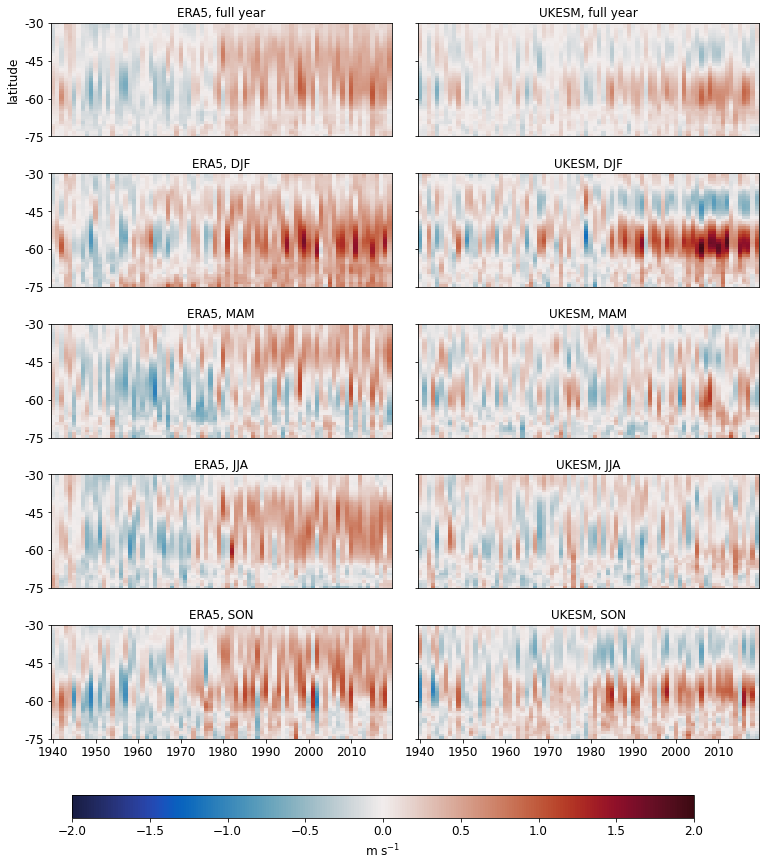

In [15]:
tt = True # for testing layout calculate only one hovmoller
hov = True
if hov:
    tvmin = -2; tvmax = 2
    tcm = cm.balance

    fact = 0.9
    fig, axs = plt.subplots(5,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharey= True)
    axs = axs.ravel()

    i = 0
    w =xr.plot.pcolormesh(ylist_ERA_FY_trend, ax = axs[0+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_ERA_DJF_trend, ax = axs[2+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_ERA_MAM_trend, ax = axs[4+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_ERA_JJA_trend, ax = axs[6+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_ERA_SON_trend, ax = axs[8+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)

    i = 1
    w =xr.plot.pcolormesh(ylist_UKESM_FY_trend, ax = axs[0+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_UKESM_DJF_trend, ax = axs[2+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_UKESM_MAM_trend, ax = axs[4+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_UKESM_JJA_trend, ax = axs[6+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    w =xr.plot.pcolormesh(ylist_UKESM_SON_trend, ax = axs[8+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)


    for i in range(1,10):
        axs[i].set_yticks([])
        axs[i].set_yticklabels([])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
    for i in range(0,8):
        axs[i].set_xticks([])
        axs[i].set_xticklabels([])

    axs[0].set_ylabel('')
    # axs[0].set_yticks(tind)
    # axs[0].set_yticklabels(tind_lat)
    axs[0].set_yticks(np.arange(-75,-15,15))
    axs[0].set_yticklabels(np.arange(-75,-15,15))
    axs[0].set_ylabel('latitude')    

    for i in range(0,10):
        axs[i].set_ylim([-75,-30])
        #axs[i].set_xticks([1940,2021,20])
    fs = 12

    axs[0].set_title('ERA5, full year', fontsize = fs)
    axs[2].set_title('ERA5, DJF', fontsize = fs)
    axs[4].set_title('ERA5, MAM', fontsize = fs)
    axs[6].set_title('ERA5, JJA', fontsize = fs)
    axs[8].set_title('ERA5, SON', fontsize = fs)

    ind = 1
    axs[0+ind].set_title('UKESM, full year', fontsize = fs)
    axs[2+ind].set_title('UKESM, DJF', fontsize = fs)
    axs[4+ind].set_title('UKESM, MAM', fontsize = fs)
    axs[6+ind].set_title('UKESM, JJA', fontsize = fs)
    axs[8+ind].set_title('UKESM, SON', fontsize = fs)

    for i in range(1,10):
        axs[i].set_yticks([])
        axs[i].set_yticklabels([])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
    #     axs[i].grid(linestyle = '-', color = 'grey', alpha = 1)

    # axs[0].set_yticks(tind)
    # axs[0].set_yticklabels(tind_lat)
    axs[0].set_yticks(np.arange(-75,-15,15))
    axs[0].set_yticklabels(np.arange(-75,-15,15))
    axs[0].set_ylabel('latitude')    

    cbar_ax = fig.add_axes([0.1, -0.06, .8, .03]) #left, bottom, width, height
    fig.colorbar(w, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

    axs[0].set_xlabel('')

    plt.tight_layout()
    plt.show()
#fig.savefig('./figs/Fig-hovmoller-diffraw.jpg')

fig.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-hovmoller.jpg")

In [16]:
mask_area = mask.aream2.mean(dim = ['time_counter'])

ylist_UKESM_FY_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,40)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_UKESM_FY_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_FY_trend = ylist_UKESM_FY_ts-ylist_UKESM_FY_50

###
ylist_UKESM_DJF_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_UKESM_DJF_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_UKESM_DJF_50 = ylist_UKESM_DJF_50.sel(time_counter=(ylist_UKESM_DJF_50['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_DJF_trend = ylist_UKESM_DJF_ts-ylist_UKESM_DJF_50
###
ylist_UKESM_MAM_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_UKESM_MAM_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_UKESM_MAM_50 = ylist_UKESM_MAM_50.sel(time_counter=(ylist_UKESM_MAM_50['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_MAM_trend = ylist_UKESM_MAM_ts-ylist_UKESM_MAM_50
###
###
ylist_UKESM_JJA_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_UKESM_JJA_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_UKESM_JJA_50 = ylist_UKESM_JJA_50.sel(time_counter=(ylist_UKESM_JJA_50['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_JJA_trend = ylist_UKESM_JJA_ts-ylist_UKESM_JJA_50
###
ylist_UKESM_SON_ts = ylist_UKESM.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_UKESM_SON_50 = ylist_UKESM.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_UKESM_SON_50 = ylist_UKESM_SON_50.sel(time_counter=(ylist_UKESM_SON_50['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_UKESM_SON_trend = ylist_UKESM_SON_ts-ylist_UKESM_SON_50

In [17]:
mask_area = mask.aream2.mean(dim = ['time_counter'])

ylist_ERA_FY_ts = ylist_ERA.wspd10m.isel(lat=slice(0,40)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_ERA_FY_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40)).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_FY_trend = ylist_ERA_FY_ts-ylist_ERA_FY_50

###
ylist_ERA_DJF_ts = ylist_ERA.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_ERA_DJF_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_ERA_DJF_50 = ylist_ERA_DJF_50.sel(time_counter=(ylist_ERA_DJF_50['time_counter.season'] == 'DJF')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_DJF_trend = ylist_ERA_DJF_ts-ylist_ERA_DJF_50
###
ylist_ERA_MAM_ts = ylist_ERA.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_ERA_MAM_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_ERA_MAM_50 = ylist_ERA_MAM_50.sel(time_counter=(ylist_ERA_MAM_50['time_counter.season'] == 'MAM')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_MAM_trend = ylist_ERA_MAM_ts-ylist_ERA_MAM_50
###
###
ylist_ERA_JJA_ts = ylist_ERA.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_ERA_JJA_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_ERA_JJA_50 = ylist_ERA_JJA_50.sel(time_counter=(ylist_ERA_JJA_50['time_counter.season'] == 'JJA')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_JJA_trend = ylist_ERA_JJA_ts-ylist_ERA_JJA_50
###
ylist_ERA_SON_ts = ylist_ERA.wspd10m.isel(lat=slice(0,40)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).T
ylist_ERA_SON_50 = ylist_ERA.wspd10m.sel(time_counter =slice("1940-01-01", "1950-01-02")).isel(lat=slice(0,40))
ylist_ERA_SON_50 = ylist_ERA_SON_50.sel(time_counter=(ylist_ERA_SON_50['time_counter.season'] == 'SON')).\
groupby('time_counter.year').mean().\
weighted(mask_area.isel(lat=slice(0,40))).mean(dim = ['lon']).mean(dim = 'year').T
ylist_ERA_SON_trend = ylist_ERA_SON_ts-ylist_ERA_SON_50

In [18]:
ylist_ERA_FY_trend

<xarray.DataArray 'wspd10m' (lat: 40, year: 80)>
dask.array<sub, shape=(40, 80), dtype=float32, chunksize=(40, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -53.5 -52.5 -51.5 -50.5
  * year     (year) int64 1940 1941 1942 1943 1944 ... 2015 2016 2017 2018 2019

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


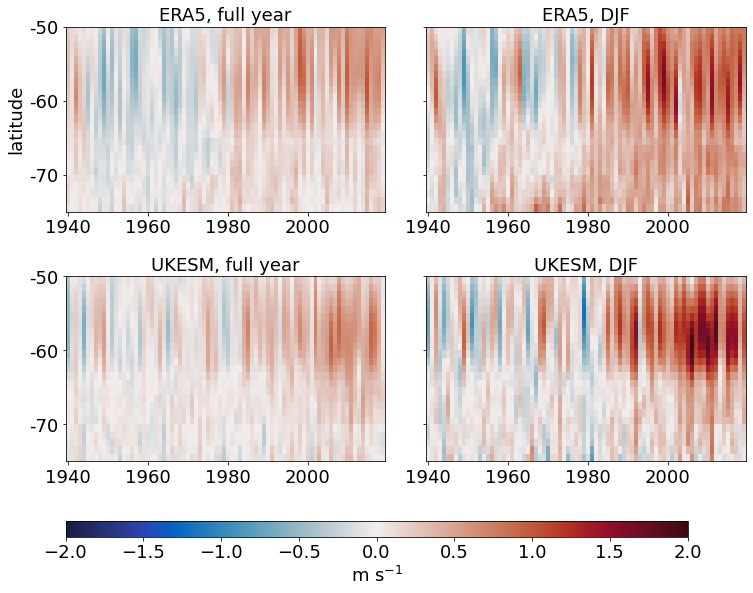

In [19]:
plt.rcParams.update({'font.size': 18})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 18}

plt.rc('font', **font)

tt = True # for testing layout calculate only one hovmoller
hov = True
if hov:
    tvmin = -2; tvmax = 2
    tcm = cm.balance

    fact = 0.9
    fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k', sharey= True)
    axs = axs.ravel()

    i = 0
    fs = 18
    w =xr.plot.pcolormesh(ylist_ERA_FY_trend[:,:], ax = axs[0+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[0].set_title('ERA5, full year', fontsize = fs)
    
    w =xr.plot.pcolormesh(ylist_UKESM_FY_trend[0:40,:], ax = axs[2], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[2].set_title('UKESM, full year', fontsize = fs)
    
    
    w =xr.plot.pcolormesh(ylist_ERA_DJF_trend[:,:], ax = axs[1], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[1].set_title('ERA5, DJF', fontsize = fs)
    w =xr.plot.pcolormesh(ylist_UKESM_DJF_trend[0:40,:], ax = axs[3], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[3].set_title('UKESM, DJF', fontsize = fs)

    for i in range(0,4):
        axs[i].set_ylim([-75,-50])
        #axs[i].set_xticks([1940,2021,20])
    fs = 18

#     axs[0].set_title('ERA5, full year', fontsize = fs)
#     axs[2].set_title('ERA5, DJF', fontsize = fs)


#     ind = 1
#     axs[0+ind].set_title('UKESM, full year', fontsize = fs)
#     axs[2+ind].set_title('UKESM, DJF', fontsize = fs)


    for i in range(1,4):
        axs[i].set_yticks([])
        axs[i].set_yticklabels([])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
    #     axs[i].grid(linestyle = '-', color = 'grey', alpha = 1)

    # axs[0].set_yticks(tind)
    # axs[0].set_yticklabels(tind_lat)
    axs[0].set_yticks(np.arange(-70,-40,10))
    axs[0].set_yticklabels(np.arange(-70,-40,10))
    axs[0].set_ylabel('latitude')    

    cbar_ax = fig.add_axes([0.1, -0.06, .8, .03]) #left, bottom, width, height
    fig.colorbar(w, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

    axs[0].set_xlabel('')

    plt.tight_layout()
    plt.show()
#fig.savefig('./figs/Fig-hovmoller-diffraw.jpg')

fig.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-hovmoller-fy-DJF.jpg")

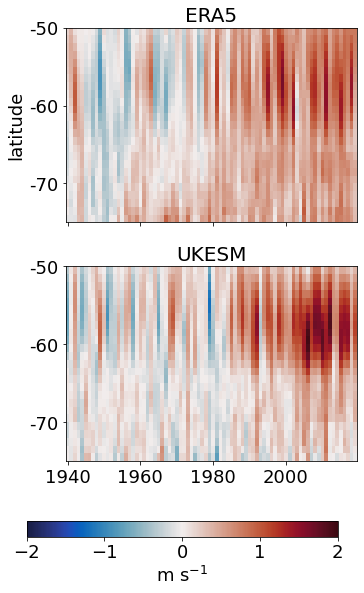

In [36]:
plt.rcParams.update({'font.size': 18})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 18}

plt.rc('font', **font)

tt = True # for testing layout calculate only one hovmoller
hov = True
if hov:
    tvmin = -2; tvmax = 2
    tcm = cm.balance

    fact = 0.9
    fig, axs = plt.subplots(2,1, figsize=(6*fact, 8*fact), facecolor='w', edgecolor='k', sharey= True)
    axs = axs.ravel()

    i = 0
    fs = 20
#     w =xr.plot.pcolormesh(ylist_ERA_FY_trend[:,:], ax = axs[0+i], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
#     axs[0].set_title('ERA5, full year', fontsize = fs)
    
# #     w =xr.plot.pcolormesh(ylist_UKESM_FY_trend[0:40,:], ax = axs[2], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
# #     axs[2].set_title('UKESM, full year', fontsize = fs)
    
    
    w =xr.plot.pcolormesh(ylist_ERA_DJF_trend[:,:], ax = axs[0], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[0].set_title('ERA5', fontsize = fs)
    w =xr.plot.pcolormesh(ylist_UKESM_DJF_trend[0:40,:], ax = axs[1], add_colorbar=False, vmin = tvmin, vmax = tvmax, cmap = tcm)
    axs[1].set_title('UKESM', fontsize = fs)

    for i in range(0,2):
        axs[i].set_ylim([-75,-50])
        #axs[i].set_xticks([1940,2021,20])
    fs = 18

#     axs[0].set_title('ERA5, full year', fontsize = fs)
#     axs[2].set_title('ERA5, DJF', fontsize = fs)


#     ind = 1
#     axs[0+ind].set_title('UKESM, full year', fontsize = fs)
#     axs[2+ind].set_title('UKESM, DJF', fontsize = fs)


    for i in range(0,2):
        axs[i].set_yticks([])
        axs[i].set_yticklabels([])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
    #     axs[i].grid(linestyle = '-', color = 'grey', alpha = 1)

    # axs[0].set_yticks(tind)
    # axs[0].set_yticklabels(tind_lat)
    axs[0].set_yticks(np.arange(-70,-40,10))
    axs[0].set_yticklabels(np.arange(-70,-40,10))
    axs[0].set_ylabel('latitude')    
    axs[0].set_xticklabels([''])

    cbar_ax = fig.add_axes([0.1, -0.06, .8, .03]) #left, bottom, width, height
    fig.colorbar(w, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

    axs[0].set_xlabel('')

    plt.tight_layout()
    plt.show()
#fig.savefig('./figs/Fig-hovmoller-diffraw.jpg')

fig.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-hovmoller-fy-DJF.jpg")

## spatial MK

docs here: 
https://pypi.org/project/pymannkendall/

In [20]:

import pymannkendall as mk
# trend, h, p, z, Tau, s, var_s, slope, intercept \
#         = mk.original_test(test2)

## extraction code for Mann-Kendall

In [21]:
horse = False
if horse:
    
    UKESM_DJF = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    UKESM_MAM = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    UKESM_JJA = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    UKESM_SON = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    UKESM_FY = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(UKESM_FY)

    ERA_DJF = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    ERA_MAM = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    ERA_JJA = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    ERA_SON = ylist_ERA.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_ERA['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    ERA_FY = ylist_ERA.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(ERA_FY)
    
    w = time.time()

    tdats = [UKESM_FY, UKESM_DJF, UKESM_MAM,UKESM_JJA, UKESM_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    savenam = '/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_1A_MK-1940-2020.nc'
    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 1940-2020'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 1940-2020'}),
    }

    lats = ylist_UKESM.lat.isel(lat = slice(0,60)).values
    lons = ylist_UKESM.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'windAnalyis/wspdComponents/FigMAP-HOV.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)


    w = time.time()

    tdats = [ERA_FY, ERA_DJF, ERA_MAM,ERA_JJA, ERA_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    savenam = '/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/ERA_MK-1940-2020.nc'
    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 1940-2020'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 1940-2020'}),
    }

    lats = ylist_ERA.lat.isel(lat = slice(0,60)).values
    lons = ylist_ERA.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'windAnalyis/wspdComponents/FigMAP-HOV.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)


In [22]:
MK_UKESM = xr.open_dataset('/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_1A_MK-1940-2020.nc')
MK_ERA = xr.open_dataset('/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/ERA_MK-1940-2020.nc')


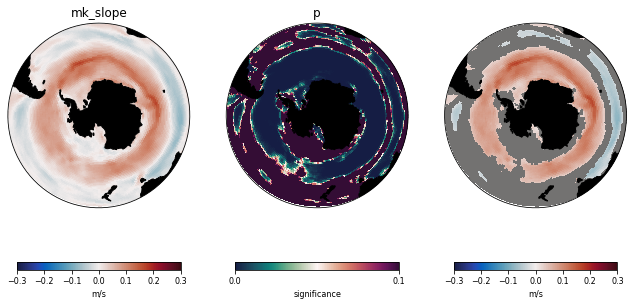

In [23]:
mk_slope = MK_UKESM.mk_slope[0,:,:]
mk_p = MK_UKESM.mk_p[0,:,:]
mk_slop_sig2 =np.copy(mk_slope)
mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
mk_slop_sig2[mk_p<=0.05] = np.nan ## will be


fact = 0.25
fig = plt.figure(figsize=[60*fact, 66*fact])

tmi = -0.3; tma = 0.3
ax1 = fig.add_subplot(1, 4, 1, projection=ccrs.Orthographic(0, -90))
bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
              tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)

tmi = 0; tma = 0.1
ax1 = fig.add_subplot(1, 4, 2, projection=ccrs.Orthographic(0, -90))
bc = plot_southern(fig, ax1, lons, lats[0:60], mk_p, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
              tit = 'p', cbarlab = 'significance', tcmap = cm.curl, lm = True, cbr = True)

tmi = -0.3; tma = 0.3
ax1 = fig.add_subplot(1, 4, 3, projection=ccrs.Orthographic(0, -90))
bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
              tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
tmi = -0.3; tma = 20
bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
             cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


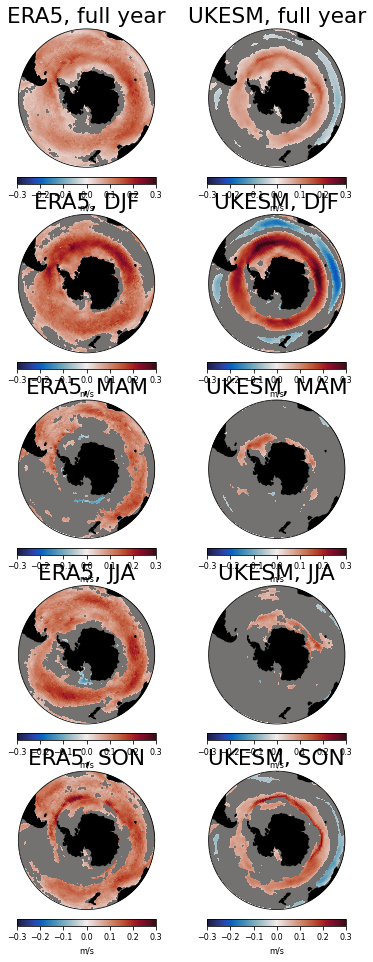

In [24]:
def plot_mk_with_sigmask(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
    tmi = -0.3; tma = 20
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    
fact = 0.25
fig = plt.figure(figsize=[25*fact, 66*fact])
tmi = -0.3; tma = 0.3

ind = 0; seas = 'full year'
ax1 = fig.add_subplot(5, 2, 1, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_ERA.mk_slope[0,:,:], MK_ERA.mk_p[0,:,:], tmi, tma)
ax1.set_title(f'ERA5, {seas}')
ax1 = fig.add_subplot(5, 2, 2, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_UKESM.mk_slope[0,:,:], MK_UKESM.mk_p[0,:,:], tmi, tma)
ax1.set_title(f'UKESM, {seas}')
ind = 1; seas = 'DJF'
ax1 = fig.add_subplot(5, 2, 1+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_ERA.mk_slope[ind,:,:], MK_ERA.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'ERA5, {seas}')
ax1 = fig.add_subplot(5, 2, 2+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_UKESM.mk_slope[ind,:,:], MK_UKESM.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'UKESM, {seas}')
ind = 2; seas = 'MAM'
ax1 = fig.add_subplot(5, 2, 1+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_ERA.mk_slope[ind,:,:], MK_ERA.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'ERA5, {seas}')
ax1 = fig.add_subplot(5, 2, 2+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_UKESM.mk_slope[ind,:,:], MK_UKESM.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'UKESM, {seas}')
ind = 3; seas = 'JJA'
ax1 = fig.add_subplot(5, 2, 1+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_ERA.mk_slope[ind,:,:], MK_ERA.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'ERA5, {seas}')
ax1 = fig.add_subplot(5, 2, 2+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_UKESM.mk_slope[ind,:,:], MK_UKESM.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'UKESM, {seas}')
ind = 4; seas = 'SON'
ax1 = fig.add_subplot(5, 2, 1+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_ERA.mk_slope[ind,:,:], MK_ERA.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'ERA5, {seas}')
ax1 = fig.add_subplot(5, 2, 2+2*ind, projection=ccrs.Orthographic(0, -90))
plot_mk_with_sigmask(fig, ax1, MK_UKESM.mk_slope[ind,:,:], MK_UKESM.mk_p[ind,:,:], tmi, tma)
ax1.set_title(f'UKESM, {seas}')

plt.tight_layout()

In [25]:
def plot_southern_return_mesh(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = 8)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=8)
    return mesh

def plot_mk_with_sigmask_return_mesh(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc1 = plot_southern_return_mesh(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = False)
    tmi = -0.3; tma = 20
    bc = plot_southern_return_mesh(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    mesh = mk_slope.values*10
    print(bc1)
    return bc1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


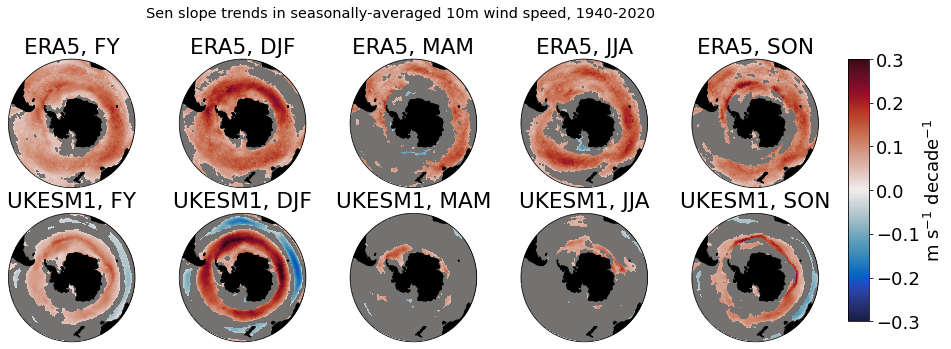

In [26]:
fact = 0.4
fig = plt.figure(figsize=[37*fact, 13*fact])
tmi = -0.3; tma = 0.3
tseas = ['FY','DJF','MAM','JJA','SON']

for ind in range(0,5):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 5, ind+1, projection=ccrs.Orthographic(0, -90))
    mesh = plot_mk_with_sigmask_return_mesh(fig, ax1, MK_ERA.mk_slope[ind,:,:], MK_ERA.mk_p[ind,:,:], tmi, tma)
    ax1.set_title(f'ERA5, {seas}')
for ind in range(0,5):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 5, ind+6, projection=ccrs.Orthographic(0, -90))
    mesh = plot_mk_with_sigmask_return_mesh(fig, ax1, MK_UKESM.mk_slope[ind,:,:], MK_UKESM.mk_p[ind,:,:], tmi, tma)
    ax1.set_title(f'UKESM1, {seas}')

cbar_ax = fig.add_axes([0.92, 0.18, .02, .7]) #left, bottom, width, height
fig.colorbar(mesh, cax=cbar_ax, orientation="vertical", label = 'm s$^{-1}$ decade$^{-1}$')
plt.suptitle('Sen slope trends in seasonally-averaged 10m wind speed, 1940-2020', y = 1.02, fontsize = 14.5)

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Seasonally-averaged 10m wind speed, climatology 1940-2020')

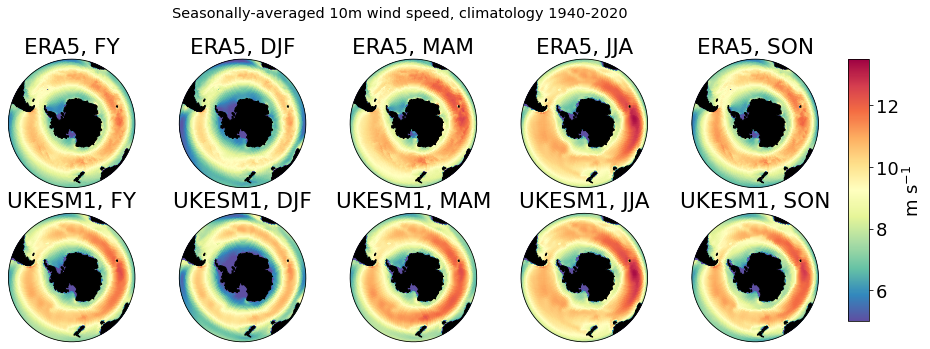

In [27]:
toplot = [ylist_ERA_FY.values, ylist_ERA_DJF.values,
          ylist_ERA_MAM.values,ylist_UKESM_JJA.values,\
          ylist_ERA_SON.values,
          ylist_UKESM_FY.values, ylist_UKESM_DJF.values,
          ylist_UKESM_MAM.values,ylist_UKESM_JJA.values,\
          ylist_UKESM_SON.values ]
          
fact = 0.4
fig = plt.figure(figsize=[37*fact, 13*fact])
tmi = 5; tma = 13.5
tti = np.arange(5,14,1)

for ind in range(0,5):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 5, ind+1, projection=ccrs.Orthographic(0, -90))
    mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind], tmi, 
                  tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    ax1.set_title(f'ERA5, {seas}')
for ind in range(0,5):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 5, ind+6, projection=ccrs.Orthographic(0, -90))
    mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind+5], tmi, 
                  tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    ax1.set_title(f'UKESM1, {seas}')
cbar_ax = fig.add_axes([0.92, 0.18, .02, .7]) #left, bottom, width, height
fig.colorbar(mesh, cax=cbar_ax, orientation="vertical", label = 'm s$^{-1}$')
plt.suptitle('Seasonally-averaged 10m wind speed, climatology 1940-2020', y = 1.02, fontsize = 14.5)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


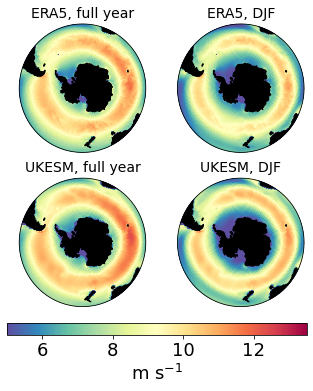

In [28]:
toplot = [ylist_ERA_FY.values, ylist_ERA_DJF.values,
          ylist_ERA_MAM.values,ylist_UKESM_JJA.values,\
          ylist_ERA_SON.values,
          ylist_UKESM_FY.values, ylist_UKESM_DJF.values,
          ylist_UKESM_MAM.values,ylist_UKESM_JJA.values,\
          ylist_UKESM_SON.values ]
          
toplot = [ylist_ERA_FY.values, ylist_ERA_DJF.values,
          ylist_UKESM_FY.values, ylist_UKESM_DJF.values,\
         ]
    
fact = 0.4
fig = plt.figure(figsize=[13*fact, 13*fact])
tmi = 5; tma = 13.5
tti = np.arange(5,14,1)
tits = ['ERA5, full year', 'ERA5, DJF', 'UKESM, full year', 'UKESM, DJF']

for ind in range(0,4):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 2, ind+1, projection=ccrs.Orthographic(0, -90))
    mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind], tmi, 
                  tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    
    ax1.set_title(tits[ind], fontsize = 14)
# for ind in range(0,5):
#     seas = tseas[ind]
#     ax1 = fig.add_subplot(2, 2, ind+6, projection=ccrs.Orthographic(0, -90))
#     mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind+5], tmi, 
#                   tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    #ax1.set_title(f'UKESM1, {seas}')
cbar_ax = fig.add_axes([0.1, 0.05, .8, .03]) #left, bottom, width, height
fig.colorbar(mesh, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

#plt.suptitle('Seasonally-averaged 10m wind speed, climatology 1940-2020', y = 1.02, fontsize = 14.5)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


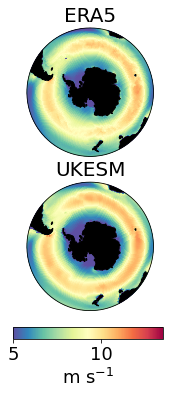

In [31]:
toplot = [ylist_ERA_FY.values, ylist_ERA_DJF.values,
          ylist_ERA_MAM.values,ylist_UKESM_JJA.values,\
          ylist_ERA_SON.values,
          ylist_UKESM_FY.values, ylist_UKESM_DJF.values,
          ylist_UKESM_MAM.values,ylist_UKESM_JJA.values,\
          ylist_UKESM_SON.values ]
          
toplot = [ylist_ERA_FY.values, ylist_ERA_DJF.values,
          ylist_UKESM_FY.values, ylist_UKESM_DJF.values,\
         ]

toplot = [ylist_ERA_DJF.values,
          ylist_UKESM_DJF.values,\
         ]
    
fact = 0.4
fig = plt.figure(figsize=[6.5*fact, 13*fact])
tmi = 5; tma = 13.5
tti = np.arange(5,14,1)
tits = ['ERA5', 'UKESM']

for ind in range(0,2):
    seas = tseas[ind]
    ax1 = fig.add_subplot(2, 1, ind+1, projection=ccrs.Orthographic(0, -90))
    mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind], tmi, 
                  tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    
    ax1.set_title(tits[ind], fontsize = 20)
# for ind in range(0,5):
#     seas = tseas[ind]
#     ax1 = fig.add_subplot(2, 2, ind+6, projection=ccrs.Orthographic(0, -90))
#     mesh = plot_southern_return_mesh(fig, ax1, lons, lats, toplot[ind+5], tmi, 
#                   tma, tti, fs = 12, tcmap = 'Spectral_r', cbr = False)
    #ax1.set_title(f'UKESM1, {seas}')
cbar_ax = fig.add_axes([0.1, 0.05, .8, .03]) #left, bottom, width, height
fig.colorbar(mesh, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

#plt.suptitle('Seasonally-averaged 10m wind speed, climatology 1940-2020', y = 1.02, fontsize = 14.5)
